In [70]:
import numpy as np
import matplotlib.pyplot as plt

### This file provides a detailed description of the process needed to verify the analitical solution.

If for whatever reason you cannot run this file the `graphing.py` file does the exact same thing in terms of actual code

####  1 - setting up the scene in the FEM program

##### 1.1 - boundary temperature
First we must set the boundary temperatures to the ones used in the analitical solution. To do that first select the Temperature layer in the layer select submenu <br>
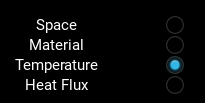

Now you should be able the see the default temperature settings <br>
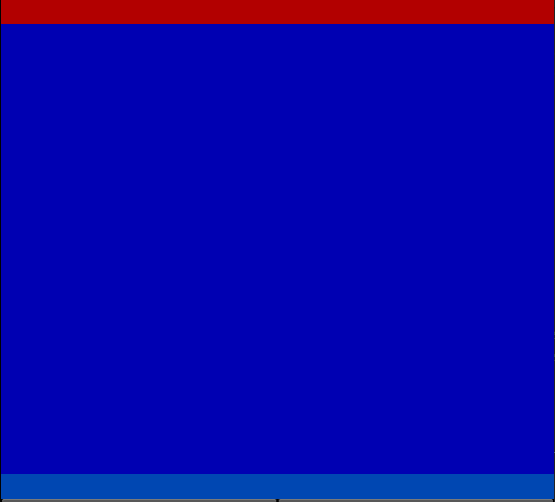

Select the Clear button at the bottom and remove all existing boundary conditions using your mouse.
At the end the layer should consist only of blue colour<br>

Now set the edit value to 300<br>
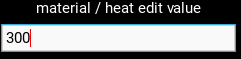<br>
click the edit button and set the left edge of the layer to 300 <br>

do the same to set the right edge to 400. At the end the temperature layer should look like this.<br>
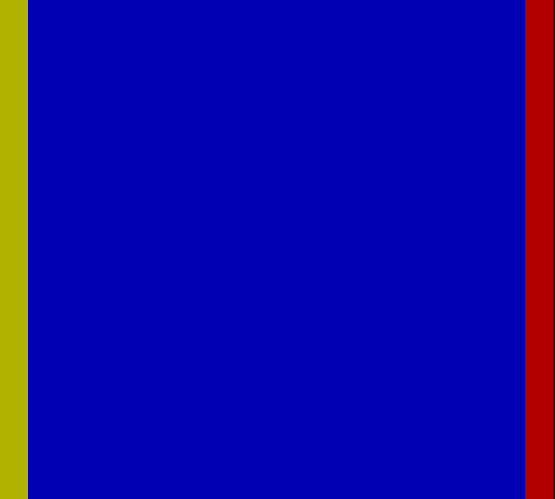


#### 1.2 Setting the material

Following the same steps select the material layer and set the left half of it to 45 and the right half to 94.
The end result should look like this<br>
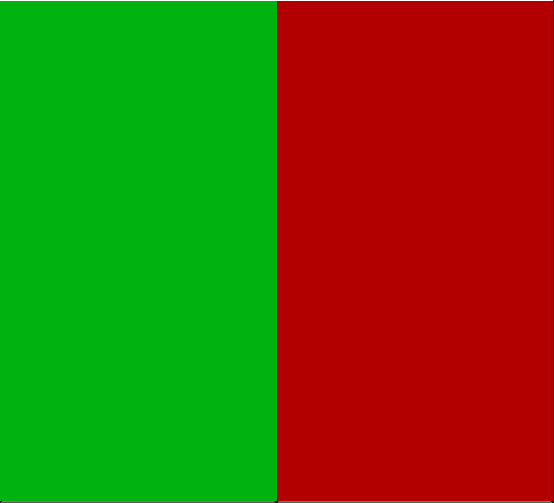

#### 2.1 - Running
Run the simulation using the button in the left bottom corner, you can view the results by not selecting any layer.

#### 2.2 - data extraction 

To save the data press the `save heatmap` button. This will generate two files. 
`heatmap.csv` contains the actual heat distribution and `coords.csv` contains the information about the position of the nodes

#### 3 - graphing

Assuming both `.csv` files have been generated correctly you can graph the resulting comparison with the analitical solution by running either this file or the one with the `.py`extension

In [71]:
T_gen = np.genfromtxt("heatmap.csv")
X = np.genfromtxt("coords.csv")

In [72]:
T1 = 300
T2 = 400

k1 = 45
k2 = 94

L = 1


In [73]:
T_gen = T_gen[0,:]
X = X[:T_gen.shape[0],0]

print(T_gen.shape,X.shape)


(20,) (20,)


In [74]:

def T(x):
    if x < 0:
        return T1 - 2*(T1-T2)/(L*k1*(1/k1+1/k2))*(x+L/2)
    return T2 - 2*(T1-T2)/(L*k2*(1/k1+1/k2))*(x-L/2)

T_vec = np.vectorize(T)

In [75]:
Y = T_vec(X)

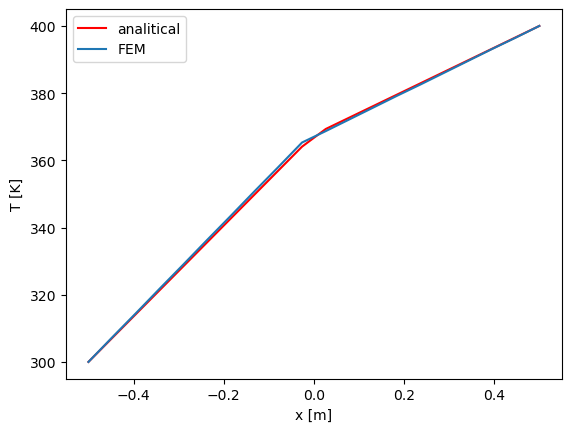

In [81]:


plt.plot(X,Y,c= 'r')
plt.plot(X,T_gen)
plt.xlabel("x [m]")
plt.ylabel("T [K]")
plt.legend(["analitical","FEM"])